In [5]:
# antes de empezar la clase deberemos instalarnos dos librerías para poder realizar la lección
#!pip install matplotlib
#!pip install seaborn

In [6]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [7]:
# traemos los datos que guardamos en el tema anterior.

df = pd.read_csv("./files/bank-additional-clean-nonulls.csv")

In [8]:
df.head()

,Unnamed: 0,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,age,euribor3m,pdays
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,40.005436,4.857000,4.4
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,noviembre,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,57.000000,3.603174,4.8
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,37.000000,4.857000,7.0
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,40.000000,3.595488,2.8
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,56.000000,3.602722,5.8


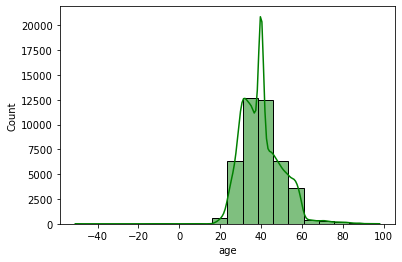

In [29]:
## Gráficos de variables numéricas

# histograma seaborn
sns.histplot(data=df, x="age", bins=20,color="g", kde=True);

Text(0.5, 1.0, 'Distribución de la edad')

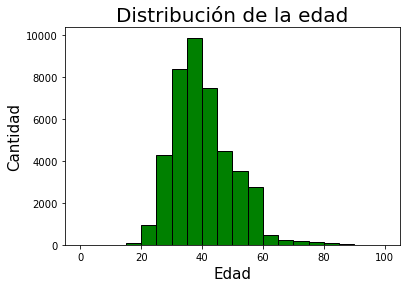

In [25]:
 # histograma matplotlib
plt.hist(data=df,
         x="age", 
         bins=20,
         color="g", 
         edgecolor="black",
         range=[0, 100]);


## añadir informacion a los gráficos
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Cantidad", fontsize=15)
plt.title("Distribución de la edad", fontsize=20)



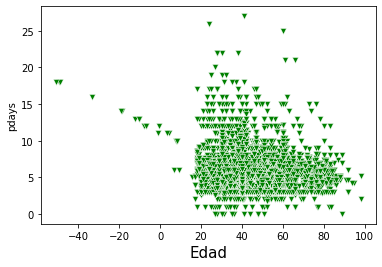

In [40]:
# dispersion
sns.scatterplot(data=df, 
                x="age", 
                y ="pdays",
                color="green", 
                marker="v");

plt.xlabel("Edad", fontsize=15);

In [ ]:
# dispersion con matplotlib
plt.scatter(data=df,
            x="age",
            y="pdays",
            color="green",
            marker="v");

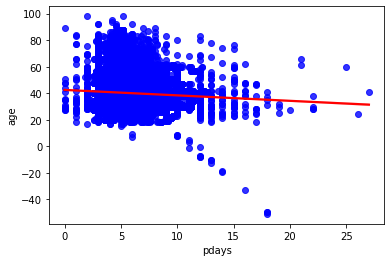

In [47]:
# regresion
sns.regplot(data=df, x="pdays", y="age", color="black", line_kws={"color":"red"}, scatter_kws={"color":"blue"});  

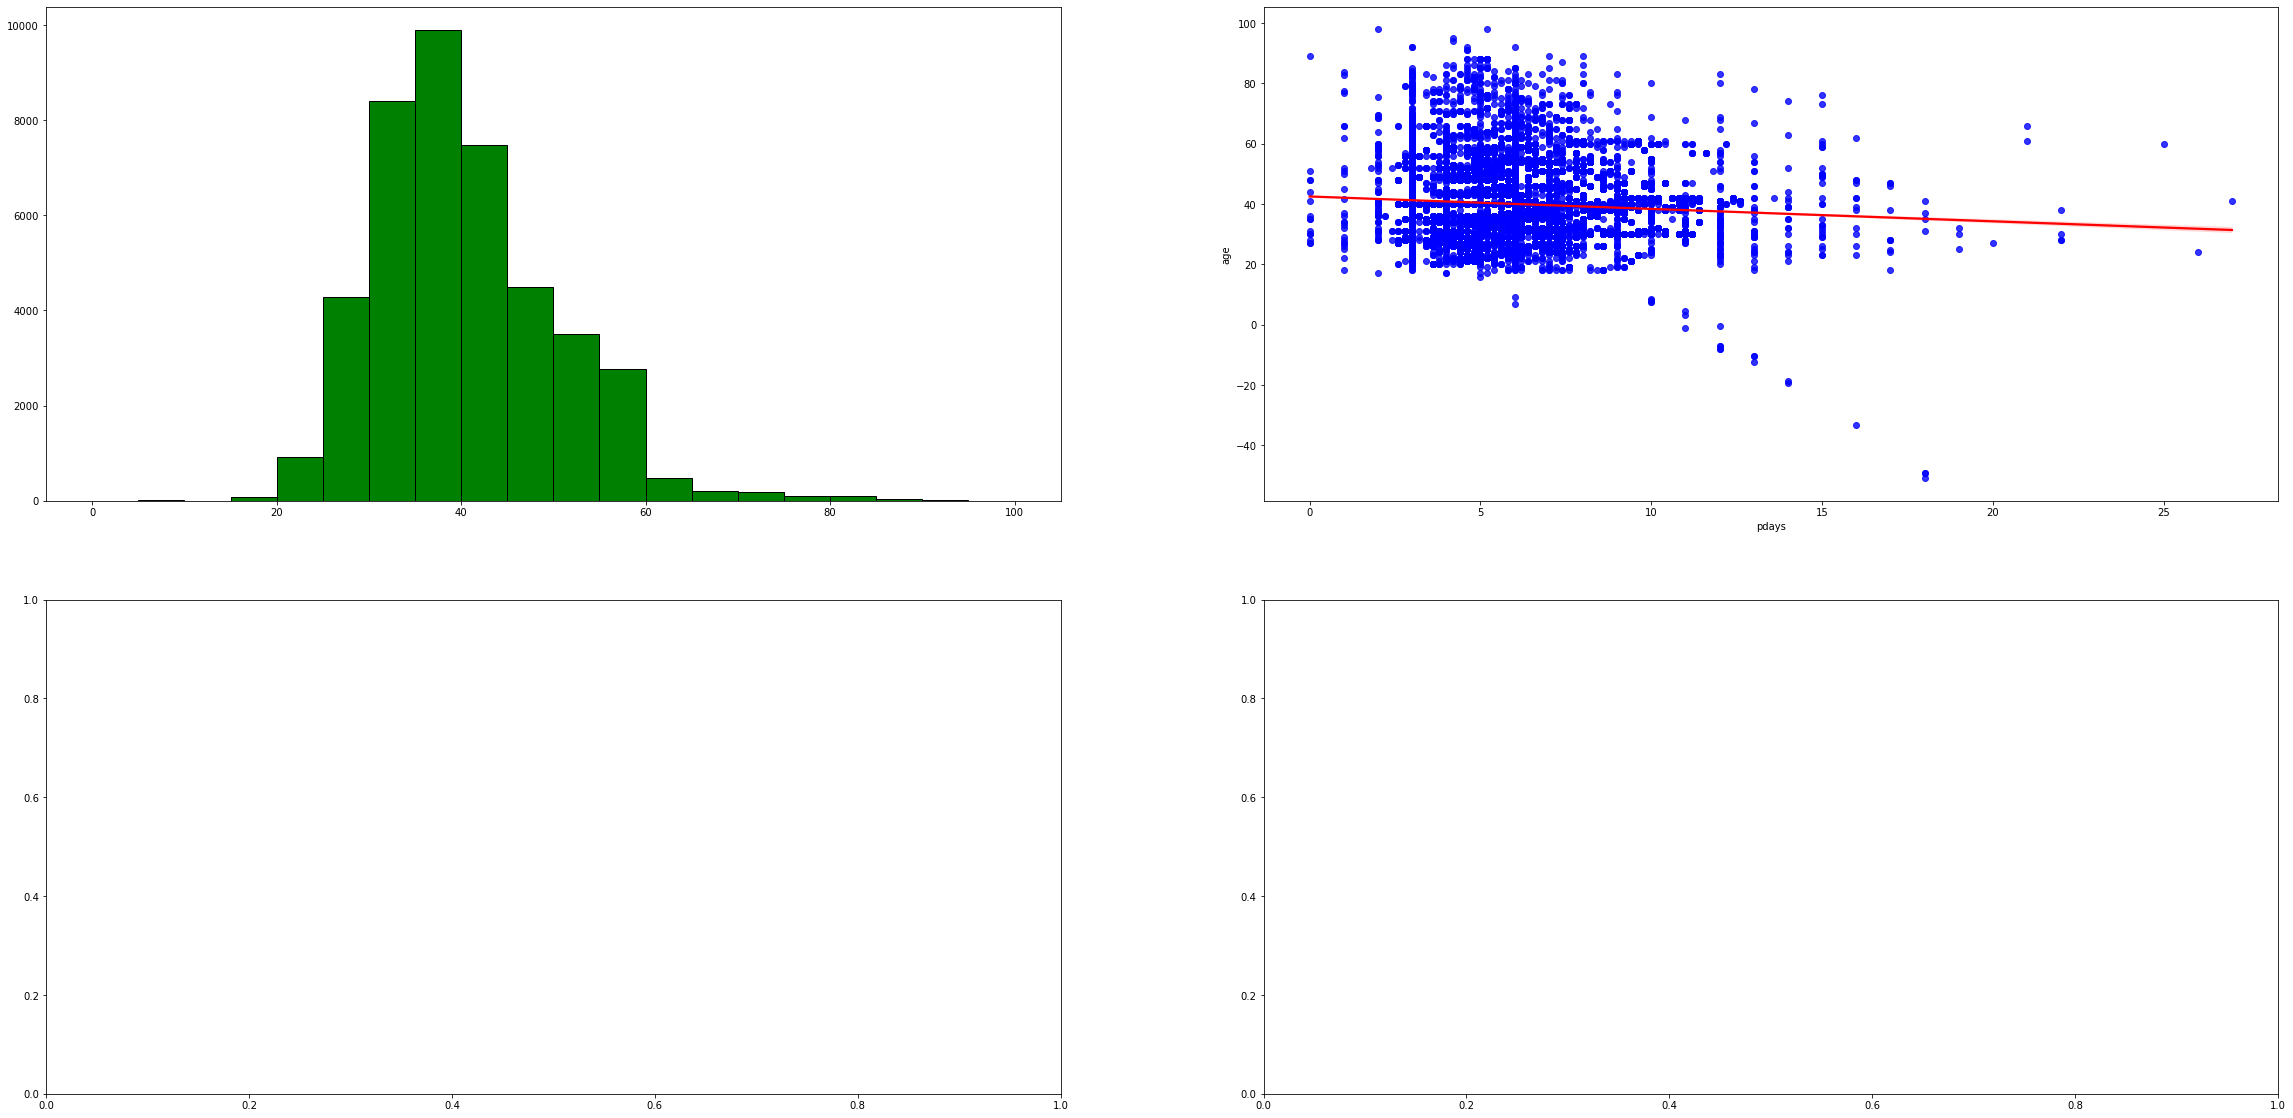

In [65]:
## ver podemos representr varios graficos en una misma figura
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(40, 20))

## seaborn
sns.regplot(data=df, 
            x="pdays", 
            y="age", 
            color="black", 
            line_kws={"color":"red"}, 
            scatter_kws={"color":"blue"},
            ax=axs[0,1]);  

## matplotlib
axs[0,0].hist(data=df,
         x="age", 
         bins=20,
         color="g", 
         edgecolor="black",
         range=[0, 100]);

fig.savefig("misupergrafico.jpg")

In [58]:
df['age'].median()

39.95594581951044

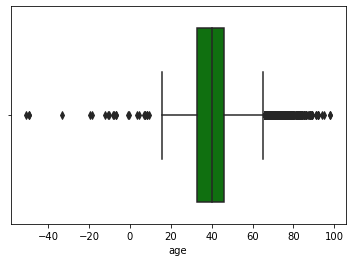

In [56]:
#boxplot
sns.boxplot(data=df, 
            x="age", 
            color="green");

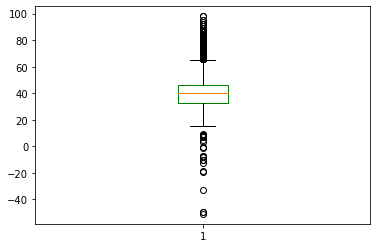

In [61]:
## mismo grafico con matplotlib
plt.boxplot(data=df, x="age", boxprops={"color":"green"});

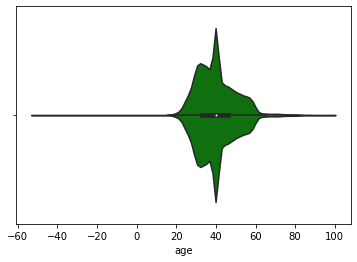

In [64]:
# violinplot 
sns.violinplot(data=df, 
               x="age", 
               color="green");

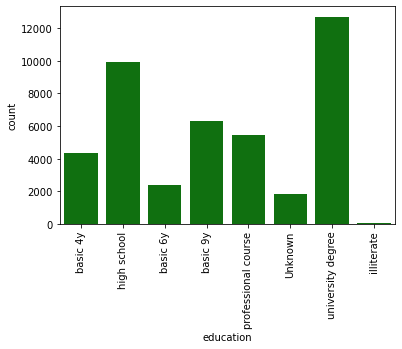

In [69]:
## Variables categóricas

df['education'].unique()

# countplot: cuenta las ocurrencias de cada valor
sns.countplot(data=df, 
              x="education", 
              color="green");

plt.xticks(rotation=90);


In [70]:
# pieplot 

df_education = df.groupby('education')["id"].count().reset_index()
df_education

,education,id
0,Unknown,1807
1,basic 4y,4356
2,basic 6y,2386
3,basic 9y,6309
4,high school,9925
5,illiterate,18
6,professional course,5477
7,university degree,12722


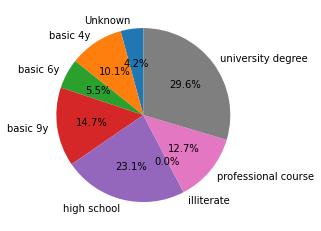

In [77]:
plt.pie("id", labels="education", data= df_education, autopct="%1.1f%%", startangle=90);

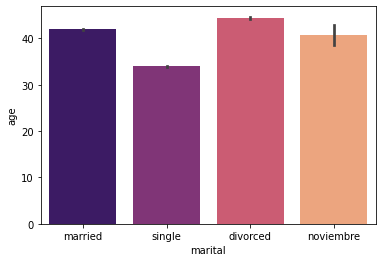

In [83]:
# analizar variables numericas y categoricas

#barplot
sns.barplot(data=df,
            x="marital", 
            y ="age",
            palette="magma");